<a href="https://colab.research.google.com/github/andreapisa9/EEGClassification/blob/main/DMTS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.6 MB 5.2 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn as sk
import matplotlib.pyplot as plt
import mne
import os

# Pre-processing

In [ ]:
list_csv = [csv for csv in os.listdir("/content/drive/MyDrive/APisani_data")]
list_csv

['data_segment1_p1_piece1_class1.csv',
 'data_segment2_p1_piece2_class1.csv',
 'data_segment3_p2_piece1_class0.csv',
 'data_segment7_p2_piece5_class0.csv',
 'data_segment5_p2_piece3_class0.csv',
 'data_segment6_p2_piece4_class0.csv',
 'data_segment8_p2_piece6_class0.csv',
 'data_segment4_p2_piece2_class0.csv',
 'data_segment9_p2_piece7_class0.csv',
 'data_segment10_p3_piece1_class1.csv',
 'data_segment11_p4_piece1_class1.csv',
 'data_segment12_p4_piece2_class1.csv',
 'data_segment16_p5_piece4_class1.csv',
 'data_segment15_p5_piece3_class1.csv',
 'data_segment14_p5_piece2_class1.csv',
 'data_segment13_p5_piece1_class1.csv',
 'data_segment17_p6_piece1_class0.csv',
 'data_segment20_p6_piece4_class0.csv',
 'data_segment19_p6_piece3_class0.csv',
 'data_segment18_p6_piece2_class0.csv',
 'data_segment21_p6_piece5_class0.csv',
 'data_segment23_p7_piece2_class1.csv',
 'data_segment24_p7_piece3_class1.csv',
 'data_segment22_p7_piece1_class1.csv',
 'data_segment25_p8_piece1_class1.csv',
 'data_se

In [ ]:
#Read 1 csv

dframe = pd.read_csv('./drive/MyDrive/APisani_data/data_segment303_p60_piece8_class1.csv')
dframe.head()

,153.04,150.89,150.71,144.98,145.52,146.59,143.01,141.76,138.54,141.58,...,177.2.52,178.45.38,177.91.43,178.45.39,174.51.44,177.56.40,177.91.44,176.84.48,179.7.38,175.77.48
0,160.020,157.690,157.150,149.990,152.320,155.000,150.350,149.810,144.980,147.840,...,167.180,169.500,168.070,168.430,163.600,167.710,169.500,166.280,167.530,163.600
1,252.020,247.900,245.930,238.950,239.310,240.920,235.550,232.330,226.240,227.490,...,236.090,237.340,236.980,236.620,232.680,237.880,239.130,238.590,241.100,237.160
2,98.802,96.654,95.938,87.704,89.852,93.611,89.852,89.852,85.377,88.420,...,116.520,118.130,117.060,116.700,110.970,115.090,117.420,115.270,117.240,112.760
3,-18.615,-19.510,-19.510,-26.132,-24.163,-22.195,-25.237,-25.237,-29.891,-27.564,...,-17.720,-15.930,-17.004,-16.467,-21.121,-18.615,-18.078,-19.510,-17.899,-23.089
4,29.175,32.576,41.167,48.685,42.420,25.416,26.848,33.471,39.377,39.198,...,46.537,38.661,46.000,53.696,59.245,52.086,42.241,46.716,53.696,61.214


In [ ]:
# Read and transform all csvs

from scipy.fft import fft
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

df_new = pd.DataFrame()
labels = []

for csv in list_csv:
  df = pd.read_csv('./drive/MyDrive/APisani_data/'+csv)
  principal_component = pca.fit_transform(df.transpose()) #pd.DataFrame
  #fft_y = fft(principal_component.values.T)
  df_temp = pd.DataFrame(np.array(principal_component).T) #fft_y.tolist()
  labels.append(csv[-5])
  df_new = pd.concat([df_new, df_temp])

df_new['Labels'] = labels

df_new

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_pca.py:595: RuntimeWarning: divide by zero encountered in true_divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var.sum()
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_pca.py:595: RuntimeWarning: divide by zero encountered in true_divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var.sum()
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_pca.py:595: RuntimeWarning: divide by zero encountered in true_divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var.sum()
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_pca.py:595: RuntimeWarning: divide by zero encountered in true_divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var.sum()
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_pca.py:595: RuntimeWarning: divide by zero encountered in true_divide
  self.explained_variance_ra

,0,1,2,3,4,5,6,7,8,9,...,30711,30712,30713,30714,30715,30716,30717,30718,30719,Labels
0,-618.621307,-1175.390555,-1228.197967,-773.206104,-428.877197,-683.961487,-1228.730978,-1340.309750,-897.344926,-480.386967,...,-743.544064,-596.006427,-296.307525,-174.438645,-309.667136,-448.775936,-395.488923,-157.526838,-67.162396,1
0,-247.175930,-443.836459,-439.200997,-219.388515,-81.361794,-211.072111,-384.945308,-367.380464,-136.775477,65.747167,...,126.965911,-162.412887,-433.873526,-275.559725,105.902797,261.985497,-3.385488,-293.402425,-213.498426,1
0,464.778676,-841.526938,-1588.212286,-798.033771,470.745774,536.873206,-675.833719,-1549.101675,-926.440277,381.989702,...,1483.009638,219.292858,-772.388041,-190.662406,1181.892184,1518.256991,363.590726,-747.865806,-340.660323,0
0,629.112659,1603.056869,1220.972770,-179.696042,-870.231713,-59.598630,1048.049688,895.657100,-399.584300,-1195.126407,...,-523.807867,-748.536187,1095.312466,2717.626121,2150.772036,275.721067,-280.253953,1331.194552,3014.609865,0
0,-1081.503876,72.781049,1197.112548,812.625612,-590.313180,-1155.169006,-129.072433,1121.210377,921.118243,-470.601169,...,-383.677353,657.217345,137.412286,-1273.525139,-1705.763441,-592.506856,581.192127,251.121716,-1151.845043,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-4.438766,-16.445143,-15.384967,-9.921238,-1.727009,-2.762400,-15.790823,-15.265334,-9.281943,-4.049175,...,-55.653961,-46.117326,-38.146807,-28.586425,-12.808521,-4.200067,-0.320031,-1.449438,-0.848563,1
0,-115.570294,-114.537352,-120.186709,-129.490126,-125.471877,-111.493195,-112.426022,-118.371890,-125.177055,-122.182142,...,28.861045,26.856843,18.649606,10.367387,16.505682,26.081797,24.279736,16.945240,11.024294,1
0,39.119526,50.140269,49.132420,37.366941,40.775930,47.664327,55.452066,57.508607,50.698343,54.367089,...,-44.713835,-38.926165,-37.499954,-45.799266,-60.711707,-61.531927,-56.920141,-51.541313,-53.923575,1
0,68.573121,73.523705,104.325768,116.712520,98.439764,79.702168,78.864939,107.705138,124.055988,103.795850,...,33.006125,67.790201,73.222186,52.439835,31.107742,38.752775,73.053387,79.170894,63.063850,0


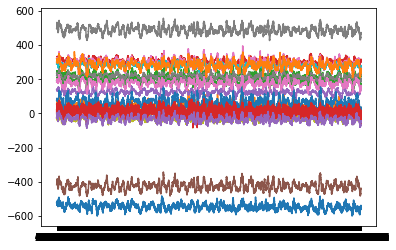

In [ ]:
# Plot 1 EEG

for i in range(len(dframe)):
  plt.plot(dframe.loc[i])
plt.show()

In [ ]:
# Execute PCA and FFT on one csv

from scipy.fft import fft
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
principal_component = pd.DataFrame(pca.fit_transform(dframe.transpose()))
fft_y = fft(principal_component.values.T)

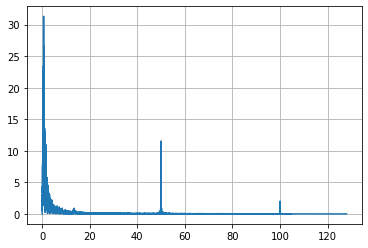

In [ ]:
# Plot after PCA and FFT

from scipy.fft import fft, fftfreq
N = 30720
T = 1.0 / 256.0
yf = fft_y.T
xf = fftfreq(N, T)[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

def metric_calc(y_true, y_pred):
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  false_positive_rate = fp / (fp + tn)
  print("False positive rate: ", false_positive_rate)
  false_negative_rate = fn / (tp + fn)
  print("False negative rate: ", false_negative_rate)
  specificity = tn / (tn + fp)
  print("Specificity: ", specificity)
  recall = recall_score(y_true, y_pred, pos_label='1')
  print("Recall (sensitivity): ", recall)
  precision = precision_score(y_true, y_pred, pos_label='1')
  print("Precision: ", precision) 
  accuracy = accuracy_score(y_true, y_pred)
  print("Accuracy: ", accuracy)
  error_rate = 1-accuracy
  print("Error rate: ", error_rate)
  f1= f1_score(y_true, y_pred, pos_label='1')
  print("F1 Score: ", f1)
  roc_auc = roc_auc_score(y_true, y_pred)
  print("ROC-AUC Score: ", roc_auc)
  '''prdisp = PrecisionRecallDisplay(precision=precision, recall=recall)
  prdisp.plot()
  rocdisp = RocCurveDisplay(fpr=false_positive_rate, tpr=recall, roc_auc=roc_auc)
  rocdisp.plot()'''

In [ ]:
clf = DecisionTreeClassifier(random_state=0)
X = df_new.iloc[:, :-1]
y = df_new['Labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.7, random_state=42)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metric_calc(y_test, y_pred)

False positive rate:  0.5714285714285714
False negative rate:  0.2682926829268293
Specificity:  0.42857142857142855
Recall (sensitivity):  0.7317073170731707
Precision:  0.7894736842105263
Accuracy:  0.6545454545454545
Error rate:  0.34545454545454546
F1 Score:  0.7594936708860759
ROC-AUC Score:  0.5801393728222997


In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegressionClassifier = LogisticRegression(random_state=0, multi_class = 'auto', solver='lbfgs', max_iter=2000)
logisticRegressionClassifier.fit(X_train, y_train)
y_pred = logisticRegressionClassifier.predict(X_test)
metric_calc(y_test, y_pred)

False positive rate:  0.875
False negative rate:  0.0975609756097561
Specificity:  0.125
Recall (sensitivity):  0.9024390243902439
Precision:  0.751269035532995
Accuracy:  0.7045454545454546
Error rate:  0.2954545454545454
F1 Score:  0.8199445983379502
ROC-AUC Score:  0.5137195121951219


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnClassifier = KNeighborsClassifier(n_neighbors = 5, metric='minkowski', p=2)
knnClassifier.fit(X_train, y_train)
y_pred = knnClassifier.predict(X_test)
metric_calc(y_test, y_pred)

False positive rate:  1.0
False negative rate:  0.018292682926829267
Specificity:  0.0
Recall (sensitivity):  0.9817073170731707
Precision:  0.7419354838709677
Accuracy:  0.7318181818181818
Error rate:  0.2681818181818182
F1 Score:  0.8451443569553806
ROC-AUC Score:  0.49085365853658536


In [ ]:
from sklearn.svm import SVC
svmClassifier = SVC(kernel='rbf', gamma='auto')
svmClassifier.fit(X_train, y_train)
y_pred = svmClassifier.predict(X_test)
metric_calc(y_test, y_pred)

False positive rate:  1.0
False negative rate:  0.0
Specificity:  0.0
Recall (sensitivity):  1.0
Precision:  0.7454545454545455
Accuracy:  0.7454545454545455
Error rate:  0.2545454545454545
F1 Score:  0.8541666666666666
ROC-AUC Score:  0.5


In [ ]:
from random import Random
from sklearn.ensemble import RandomForestClassifier
randomForestClassifier = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
randomForestClassifier.fit(X_train, y_train)
y_pred = randomForestClassifier.predict(X_test)
metric_calc(y_test, y_pred)

False positive rate:  0.9821428571428571
False negative rate:  0.018292682926829267
Specificity:  0.017857142857142856
Recall (sensitivity):  0.9817073170731707
Precision:  0.7453703703703703
Accuracy:  0.7363636363636363
Error rate:  0.26363636363636367
F1 Score:  0.8473684210526315
ROC-AUC Score:  0.4997822299651568


In [ ]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metric_calc(y_test, y_pred)

False positive rate:  0.4642857142857143
False negative rate:  0.43902439024390244
Specificity:  0.5357142857142857
Recall (sensitivity):  0.5609756097560976
Precision:  0.7796610169491526
Accuracy:  0.5545454545454546
Error rate:  0.44545454545454544
F1 Score:  0.6524822695035462
ROC-AUC Score:  0.5483449477351916


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:546: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_score = check_array(y_score, ensure_2d=False)
